# Problem Set 7

##### Due Friday November 18th at 11:59pm

### Problem 1

<div>
<img src="problems/1.png" width="600">
</div>

<IPython.core.display.Javascript object>


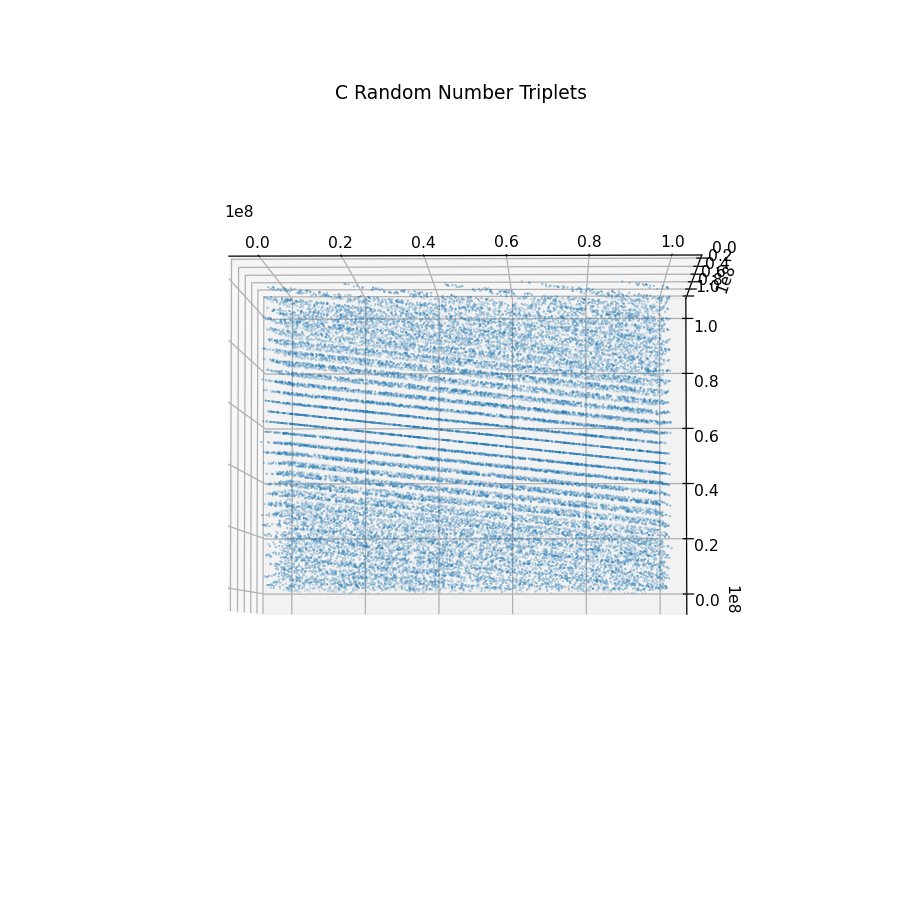

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

data = np.loadtxt('rand_points.txt')
x = data[:,0]
y = data[:,1]
z = data[:,2]

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, marker ='.', s=0.2)
ax.set_title('C Random Number Triplets')

plt.show()

For some reason with the way I'm plotting the data in 3d, I couldn't get the planes to all be viewable from the same angle, but by simply rotating up and down from the position above, it can be seen that the random tripes all fall onto planes.

<IPython.core.display.Javascript object>


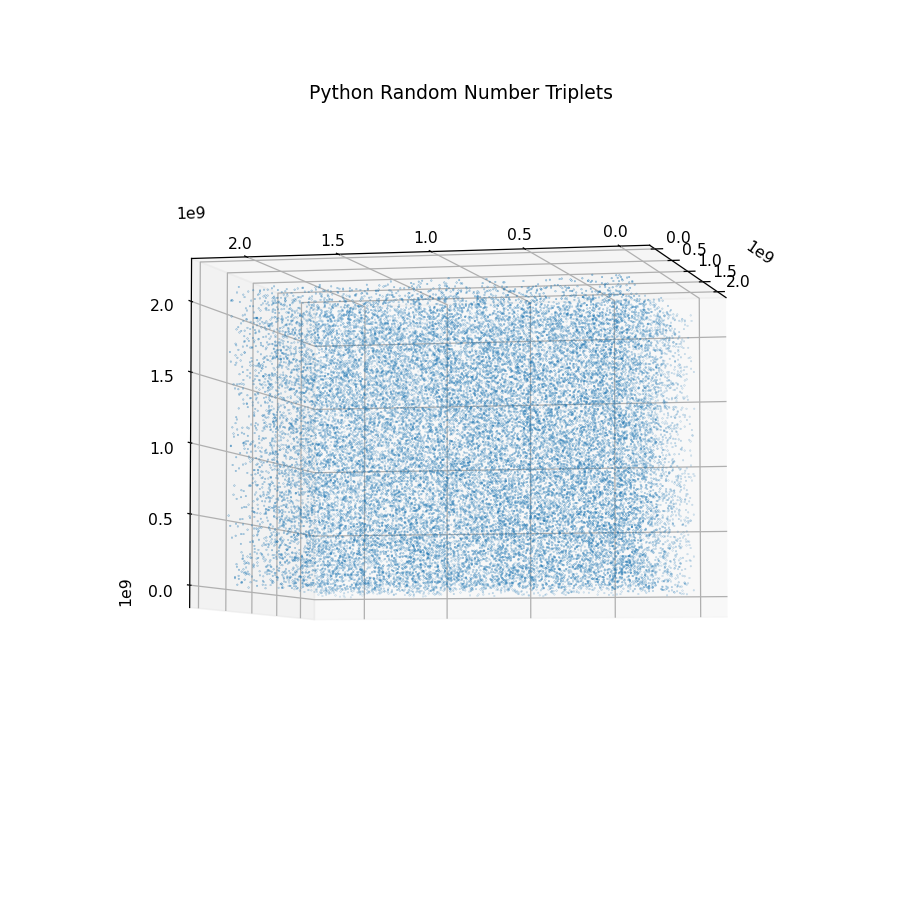

In [47]:
from random import randint

def get_rands_nb(vals):
    n=len(vals)
    for i in range(n):
        vals[i]=randint(0, 2**31)
    return vals

def get_rands(n):
    vec=np.empty(n,dtype='int32')
    get_rands_nb(vec)
    return vec

n=len(x)
xp = get_rands(n)
yp = get_rands(n)
zp = get_rands(n)

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.scatter(xp, yp, zp, marker ='.', s=0.2)
ax.set_title('Python Random Number Triplets')

plt.show()

Even after rotating around 3d space, the random numbers generated with python do not show the same planes of random numbers as C, but rather it seems to be generating actual pseudo random numbers.

I couldn't figure out how to get ctypes.cdll.loadlibrary to work in calling the random number generator library from C.

<div>
<img src="problems/2.png" width="600">
</div>

C:\Users\adesr\AppData\Local\Temp/ipykernel_4384/3676003091.py:13: RuntimeWarning: divide by zero encountered in reciprocal
  y3 = x**(-1)


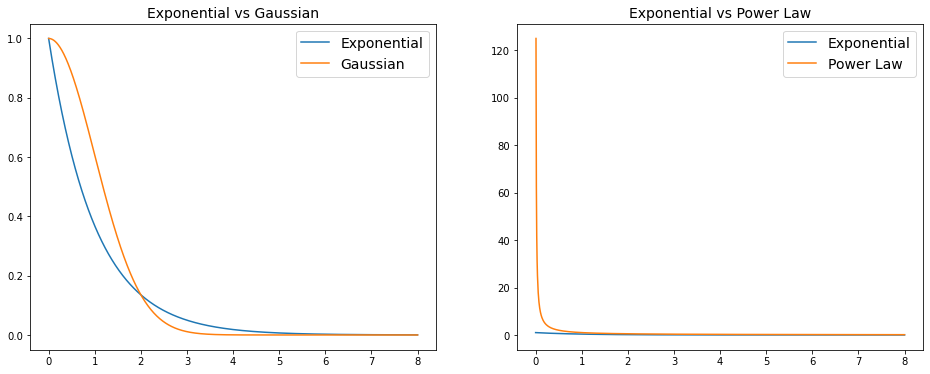

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x):
    return np.exp(-0.5*x**2)
def lorentz(x):
    return 1/(1+x**2)

x = np.linspace(0,8,1001)
y = np.exp(-x)
mult = max(y)
y2 = gaussian(x)
y3 = x**(-1)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Exponential vs Gaussian', fontsize=14)
plt.plot(x,y, label='Exponential')
plt.plot(x,y2, label='Gaussian')
plt.legend(fontsize=14)
plt.subplot(1,2,2)
plt.title('Exponential vs Power Law', fontsize=14)
plt.plot(x,y, label='Exponential')
plt.plot(x,y3, label='Power Law')
plt.legend(fontsize=14)
plt.show()

Can't use gaussian because it doesnt stay above exponential for all positive x. We also don't want to use a power law because they shoot up towards infinity as they approach 0 and so we would have to throw out so many random guesses that our acceptance percentage would be awful. As we can see below though, a lorentzian works well for this.

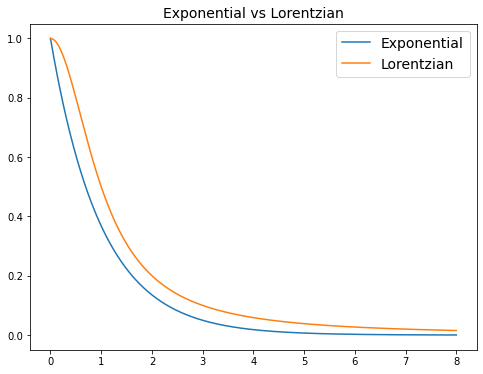

In [2]:
y4 = lorentz(x)

plt.figure(figsize=(8,6))
plt.title('Exponential vs Lorentzian', fontsize=14)
plt.plot(x,y, label='Exponential')
plt.plot(x,y4, label='Lorentzian')
plt.legend(fontsize=14)
plt.show()

We must first normalize our lorentzian as we are only evaluating positive values of x, therefore:

$1 = \int_{0}^{\infty} \frac{a}{1+x^2} dx = a\cdot arctan(x) |_{0}^{\infty} = a\cdot arctan(\infty) = a\cdot \frac{\pi}{2} = 1 \rightarrow a = \frac{2}{\pi}$


We are going to use our lorentz function to generate random numbers, so we need to take the cumulative density function of a lorentzian:

$\int_{0}^{x} \frac{2}{\pi}\cdot \frac{1}{1+x^2} dx = \frac{2}{\pi}\cdot arctan(x) |_{0}^{x} = \frac{2}{\pi}\cdot arctan(x)$

Now that we have our CDF, we set it equal to a random number, which we will then invert to find out what x needs to be equal to to get random numbers following a lorentzian from uniformly distributed random number between 0 and 1:

$r = \frac{2}{\pi}\cdot arctan(x) \rightarrow x = tan(r\cdot \frac{\pi}{2})$

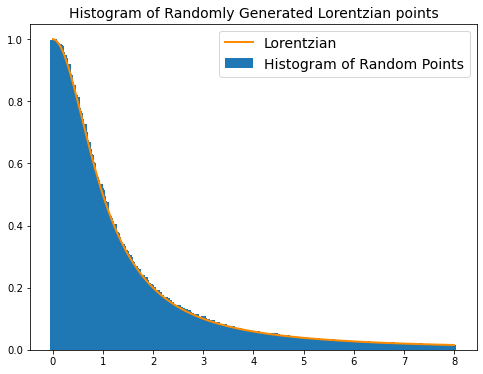

In [3]:
def lorentz_rand(r):
    return np.tan(r*np.pi/2)

def pos_lorentz(x):
    return (2/np.pi)/(1+x**2)
    
n = int(1e6)
r = np.random.rand(n)
xs = lorentz_rand(r)

bins = np.linspace(0,8,501)
counts, b = np.histogram(xs, bins)
counts = counts/max(counts)
b_center = 0.5*(bins[1:]+bins[:-1])

plt.figure(figsize=(8,6))
plt.title('Histogram of Randomly Generated Lorentzian points', fontsize=14)
plt.bar(b_center,counts, width=0.1, label='Histogram of Random Points')
plt.plot(b_center, pos_lorentz(b_center)/max(pos_lorentz(b_center)), color='darkorange', linewidth=2, label='Lorentzian')
plt.legend(fontsize=14)
plt.show()

Now that we have our lorentzian random number generator working, in order to create exponentially distributed random numbers, we need to get rid of points that don't fall under the eponential curve.

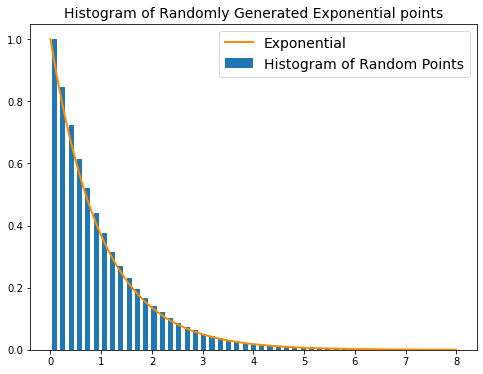

The acceptance percentage is 63.57%


In [4]:
n = int(1e6)
r = np.random.rand(n)
xs = lorentz_rand(r)
accept = np.random.rand(n)<np.exp(-xs)/lorentz(xs)
        #Getting rid of points from our lorentzian
        #RNG that don't fall under our exponential
x_use = xs[accept]

bins = np.linspace(0,8,50)
counts, b = np.histogram(x_use, bins)
counts = counts/max(counts)
b_center = 0.5*(bins[1:]+bins[:-1])

plt.figure(figsize=(8,6))
plt.title('Histogram of Randomly Generated Exponential points', fontsize=14)
plt.bar(b_center, counts, 0.1, label='Histogram of Random Points')
plt.plot(x, np.exp(-x), color='darkorange', linewidth=2, label='Exponential')
plt.legend(fontsize=14)
plt.show()
print('The acceptance percentage is {}%'.format(round(np.mean(accept)*100,2)))

The most efficient I could make the exponential RNG was 63.67%, meaning that 63.67% of numbers generated using the lorentzian RNG were used for the exponential RNG and the rest fell outside the range of the exponential.

<div>
<img src="problems/3.png" width="600">
</div>

To find the limits on v, we need to use the equation $u < \sqrt{P(v/u)}$, where in our case $P(x) = e^{-x}$. This means that at our limit for v is

$u = \sqrt{e^{-v/u}} = e^{-0.5\cdot v/u} \rightarrow ln(u) = -0.5\cdot v/u \rightarrow v = -2\cdot u \cdot ln(u)$

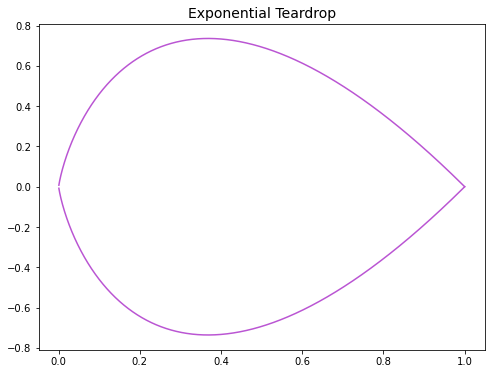

The maximum value of v is 0.7357588428385197


In [5]:
u = np.linspace(0,1,2001)
u = u[1:]
v=-2*u*np.log(u)
maxv = max(v)

plt.figure(figsize=(8,6))
plt.plot(u,v, color='mediumorchid')
plt.plot(u,-v, color='mediumorchid')
plt.title('Exponential Teardrop', fontsize=14)
plt.show()
print('The maximum value of v is {}'.format(maxv))

C:\Users\adesr\AppData\Local\Temp/ipykernel_4384/638754313.py:8: RuntimeWarning: overflow encountered in exp
  accept = u<np.exp(-0.5*r)


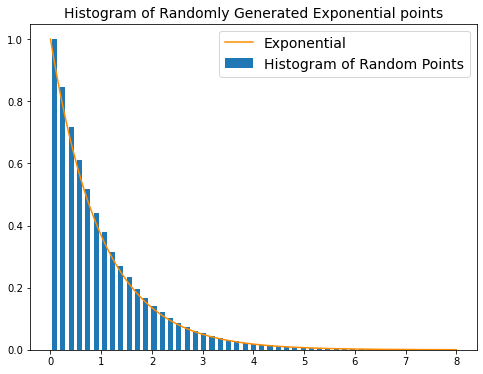

The acceptance percentage is 83.98%


In [7]:
n = int(1e6)
u = np.random.rand(n)
v = (np.random.rand(n)*2-1)*maxv
        #random numbers sampled from
        #a rectangle around the above
        #teardrop shape for v
r = v/u
accept = u<np.exp(-0.5*r)
        #from the random numbers sampled
        #from the rectangle, accept only
        #those that fall in the teardrop
expo = r[accept]

bins = np.linspace(0,8,50)
counts, b = np.histogram(expo, bins)
counts = counts/max(counts)
b_center = 0.5*(bins[1:]+bins[:-1])

plt.figure(figsize=(8,6))
plt.title('Histogram of Randomly Generated Exponential points', fontsize=14)
plt.bar(b_center,counts,0.1, label='Histogram of Random Points')
plt.plot(x,np.exp(-x),'darkorange', label='Exponential')
plt.legend(fontsize=14)
plt.show()
print('The acceptance percentage is {}%'.format(round(np.mean(accept)*100,2)))

As can be seen above, using a ratio-of-uniforms generator gives us the same result as in problem 2, but the big advantage to this method is how much higher our acceptance percentage is, which has risen by over 20% to 83.98%.